# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata.

En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 

* [Wikipedia](


In [1]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
import dhlab.token_map as tm
import dhlab.graph_networkx_louvain as gnl

In [2]:
mu.css()

Bygg et korpus, en samling bøker basert på dewey - vi skal prøve samme øvelse også med emneord

In [29]:
bøker = nb.book_corpus(
    period=(1950, 2010),
    subject='verdenskrig', limit = 200)

In [30]:
bøker

,urn,author,title,year
0,2008052901001,"Popov, Dusko",Spion og kontraspion,1975
1,2010111206010,"Øksendal, Asbjørn",Sluttspill i Rinnans bandekloster,1971
2,2011031505062,"Lyngvi, Arne",Bomber over Laksevåg,2000
3,2007051500065,"Hartmann, Sverre",Nytt lys over kritiske faser i Norges historie...,1965
4,2011110805124,"Fløgstad, Kjartan",Grense Jakobselv,2009
...,...,...,...,...
195,2010091308042,"Berger, Aase",Flyktningelos i grenseland,1998
196,2013091838139,"Flatmark, Jan Olav",Ålesund i hverdag og krig,1988
197,2016110348070,"Hoddevik, Jan Petter","""Sanct Svitun""s krigsforlis",1993
198,2011011420014,"Bratbak, Bjørn",Kjærlighet krever offer,1996


## Undersøk forskjeller

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [22]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = nb.get_corpus_text(nb.pure_urn(bøker)[:5])

In [31]:
bøker_dtm

,2014062307018,2015091506077,2011070605066,2007072601104,2007112100010
",",29182.0,4818.0,473.0,2970.0,2765.0
.,19675.0,8019.0,605.0,2582.0,11639.0
og,12189.0,4869.0,386.0,1575.0,2680.0
i,9760.0,4427.0,376.0,1352.0,3841.0
det,8353.0,1478.0,114.0,749.0,2398.0
...,...,...,...,...,...
.1941,NaN,NaN,NaN,NaN,1.0
(panservern),NaN,NaN,NaN,NaN,1.0
(mitralj??se)kompani.,NaN,NaN,NaN,NaN,1.0
(gev??r)kompani.,NaN,NaN,NaN,NaN,1.0


Et varmekart gjør det enklere å spotte likhet og variasjon i tallene.

In [32]:
bøker_dtm.head(50).fillna(0).style.background_gradient()

,2014062307018,2015091506077,2011070605066,2007072601104,2007112100010
",",29182.000000,4818.000000,473.000000,2970.000000,2765.000000
.,19675.000000,8019.000000,605.000000,2582.000000,11639.000000
og,12189.000000,4869.000000,386.000000,1575.000000,2680.000000
i,9760.000000,4427.000000,376.000000,1352.000000,3841.000000
det,8353.000000,1478.000000,114.000000,749.000000,2398.000000
jeg,7553.000000,48.000000,12.000000,346.000000,98.000000
på,6985.000000,1272.000000,120.000000,675.000000,0.000000
en,6909.000000,1306.000000,108.000000,555.000000,1672.000000
å,6849.000000,1301.000000,139.000000,657.000000,0.000000
til,6641.000000,1929.000000,230.000000,889.000000,2588.000000


Tre hundre bøker tar en tid å laste ned og telle opp lokalt så vi teller på server med passende kommando:

In [42]:
%%time
bøker_agg = nb.aggregate_urns(nb.pure_urn(bøker))

Wall time: 7.16 s


Så konverteres listen over ord og tall til en dataramme

In [34]:
bøker_df = nb.frame_sort(nb.frame(bøker_agg, 'count'))

For referanse henter vi ut de 50000 mest frekvente ordene i bokhylla.

In [35]:
totals = nb.frame(nb.totals(50000), 'tot')

Sånn ser frekvensene ut for bøkene

In [36]:
bøker_df.head(20)

,count
.,1549379
",",1471011
og,652071
i,633638
-,444200
til,378189
var,361243
som,333847
av,331560
det,314050


.. og sånn for bokhylla

In [45]:
totals.head(20)

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728
som,0.012343
til,0.011847
er,0.011580
av,0.010948
en,0.010783


In [46]:
nb.normalize_corpus_dataframe(bøker_df)

True

In [47]:
nb.normalize_corpus_dataframe(totals)

True

Vi finner forskjellen ved å dividere den ene på den andre:

In [48]:
forskjell = bøker_df['count']/totals['tot']

Tallene må sorteres, de høyeste tolkes til å være de mest relevante

In [49]:
bøker_typiske_ord = nb.frame_sort(nb.frame(forskjell, 'ratio'))
bøker_typiske_ord.head(50)

,ratio
løsl,399.339343
f.nr,271.687362
ank.,260.698415
ovf.,238.284190
Møllergata,224.161826
Sachsenhausen,115.590236
Vollan,105.835156
Grini,93.589209
Terboven,59.756904
Quislings,58.727300


# Metadata for korpuset kan raskt sjekkes

Pass på at ikke korpuset er for stort (mange tusen).

In [51]:
nb.frame(nb.metadata(nb.pure_urn(bøker)), 'urn forfatter år tittel subtittel forlag sjanger sesamid språk'.split())

,urn,forfatter,år,tittel,subtittel,forlag,sjanger,sesamid,språk,9
0,2008052901001,"Popov, Dusko",1975,Spion og kontraspion,,Cappelen,notfiction,9ef0f310b4aed95a6a230a2502847a28,nob,eng
1,2010111206010,"Øksendal, Asbjørn",1971,Sluttspill i Rinnans bandekloster,Gestapo i Trondheim på jakt etter mennene bak ...,Nordenfjelske,unknown,27a530e8e7a30b5c4f8e3cf846a10cc8,nob,
2,2011031505062,"Lyngvi, Arne",2000,Bomber over Laksevåg,4. oktober 1944 og tiden som fulgte,Sigma,notfiction,1ea49eac5ac3f746570b7acb8c3c0ef4,nob,
3,2007051500065,"Hartmann, Sverre",1965,Nytt lys over kritiske faser i Norges historie...,,Fabritius,notfiction,cc30cd91f94e35dec2d2cd3492688b1a,nob,
4,2011110805124,"Fløgstad, Kjartan",2009,Grense Jakobselv,roman,Gyldendal,novel,ac0b8508dc7003e6513c569e891fc9ab,nno,
...,...,...,...,...,...,...,...,...,...,...
195,2010091308042,"Berger, Aase",1998,Flyktningelos i grenseland,loser fra Halden til Grue Finnskog under Andre...,"Thorsrud, Lokalhistorisk forl.",notfiction,a512d591da3b213882743ad63483b8cc,nob,
196,2013091838139,"Flatmark, Jan Olav",1988,Ålesund i hverdag og krig,små og store hendelser fra de underlige åra 19...,"Nordvest forlag;Ålesund : Nordvest forlag, cop...",notfiction,d2ba7198b0c1cb58f8b8309af77cef1c,und,
197,2016110348070,"Hoddevik, Jan Petter",1993,"""Sanct Svitun""s krigsforlis",eit 50 års minne,[J.P. Hoddevik],,36835940d74c426a7d743bf5b0d5b653,nno,
198,2011011420014,"Bratbak, Bjørn",1996,Kjærlighet krever offer,,[B. Bratbak],unknown,f8048056bbc49a2a15f326ccf0a9b431,nob,


### Søk etter sett av ord i clustret



In [52]:
nb.frame_sort(bøker_typiske_ord.loc['det sår krig . , gevær våpen generaler soldater blod fattigdom nød'.split()])

,ratio
soldater,12.879532
generaler,8.788287
våpen,5.223900
krig,5.131525
gevær,4.526474
",",0.996179
nød,0.963872
.,0.916267
det,0.859775
sår,0.799157


In [53]:
G = nb.make_network(2007060501049,"""revolusjonen, kritikk, arbeiderklassen, virkelige, sosialistiske, revolusjon, samfunnets, herredømme, sosialisme, samfunnet, samfunn, borgerskapet, proletariatet, samfunnsmessige, teorien, herskende, kapitalen, sosialismen, materielle, demokratiske, allmenne, kapitalistiske, arbeiderne, arbeidernes, proletariatets, vesentlige, eksistens, samfunnsmessig, borgerlige, arbeiderklassens, arbeidskraft, naturen, arbeidende, revolusjonær, Frankrike, menneskets, kommunismen, menneskelig, utbytting, økonomien, klassekampen, middel, revolusjonære, nødvendighet, arbeideren, skiller, vitenskap, grunnleggende, vitenskapelig, intellektuelle, uunngåelig, produksjonsmidlene, frie, prinsipp, nasjoner, massene, absolutte, kjempe, opprør, umiddelbart, kamp, enhet, undertrykte, 1848, vitenskapen, bind, kapitalistene, allmenn, bønder, frigjøring, vitenskapelige, Paris, virkelighet, diktatur, følgelig, klassene, sosialistisk, produksjon, Marx, politikken, arbeidere, motsetningen, Kapitalen, umiddelbare, produksjonsforhold, menneskenes, produserer, Hegel, produsere, konkurransen, borgerskapets, bevissthet, grunnlaget, eiendom, frihet, kapitalister, kapitalist, slutter, religiøse, produktive, innbyrdes, tvinger, forsvinner, folkets, forvandlet, profitt, kapitalisten, organer, sosial, produksjonen, borgerskap, trinn, nasjon, massen, filosofiske, Kapitalens, arbeidets, sosialt, produktene, nødvendigheten, profitten, avskaffe, kritikken, egenskap, klassekamp, hersker, produksjonsmidler, proletariske, produktet, Lenins, proletariat, skaper, kapitalismen, fellesskap, partiet, objektive, kommunisme, lykkes, eksistere, storindustrien, kommunistene, produksjonsprosessen, slaver, bekostning, flertallet, Italia, vold, abstrakt, demokratisk, individ""".split(', '))

In [63]:
list(bøker_typiske_ord.index)[:20]

['løsl',
 'f.nr',
 'ank.',
 'ovf.',
 'Møllergata',
 'Sachsenhausen',
 'Vollan',
 'Grini',
 'Terboven',
 'Quislings',
 'Wehrmacht',
 'Milorg',
 'Quisling',
 'Auschwitz',
 'Vidkun',
 'freden',
 'Goebbels',
 'Himmler',
 'konvoien',
 'alliertes']

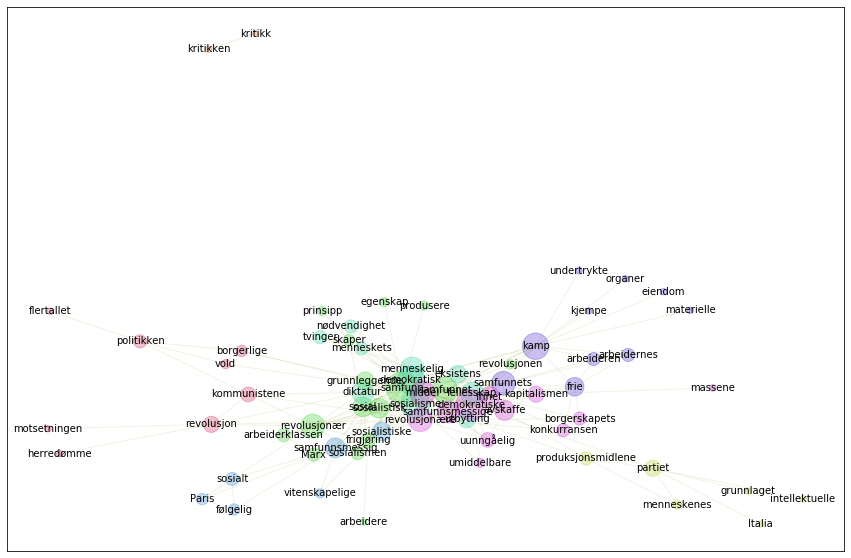

In [70]:
gnl.show_graph(G)

In [29]:
bok = nb.pure_urn(bøker)[0]
nb.metadata(bok)

[[2013091905073,
  'Fretheim, Tor',
  1994,
  'Langsom trio',
  '',
  'Gyldendal',
  'fiction',
  'c31aa77141d27110ba2e737de3aa4a74',
  'nob',
  '']]

In [30]:
R = nb.navn(bok)
R

{'Abel': 15,
 'Akerselva': 3,
 'Allegro': 2,
 'Alm': 27,
 'Alms': 7,
 'Arnold': 21,
 'Arvika': 4,
 'Bad': 8,
 'Capri': 29,
 'Cocktail': 14,
 'Damm': 2,
 'Dem': 5,
 'Døden': 8,
 'Edith': 14,
 'Ei': 3,
 'Ekvator': 3,
 'Emils': 27,
 'Erik': 41,
 'Fretheim': 10,
 'Frogner': 2,
 'Fy': 3,
 'Gi': 2,
 'Grunerløkka': 3,
 'Gud': 2,
 'Gyldendal': 7,
 'Halvorsens': 4,
 'Hamburg': 3,
 'Hanshaugen': 3,
 'Hauke': 346,
 'Helgens': 3,
 'Herre': 5,
 'Hu': 3,
 'Husk': 5,
 'Hører': 5,
 'Ingensteder': 2,
 'Ja': 28,
 'Ja-': 2,
 'Jamen': 5,
 'Jassa': 4,
 'Jeg': 291,
 'Jenta': 3,
 'Jo': 11,
 'Kari': 2,
 'Karl': 9,
 'Kjenner': 2,
 'Kjære': 3,
 'Klemmt': 358,
 'Klemmts': 13,
 'Kommer': 3,
 'Kona': 3,
 'Laila': 49,
 'Lakkegata': 4,
 'Langsom': 4,
 'Leirfallsgata': 22,
 'Mamma': 5,
 'Marka': 7,
 'Markveien': 2,
 'Min': 3,
 'Måneskinnsvalsen': 5,
 'Nationaltheatret': 2,
 'Nesodden': 3,
 'Neste': 5,
 'Norge': 5,
 'Norway': 2,
 'Nøkken': 3,
 'Oslo': 8,
 'Paris': 3,
 'Per': 19,
 'Pernille': 7,
 'Piaf': 14,
 'Randi': 

In [31]:
RN = nb.check_navn(R, limit=2)

In [32]:
RN

{'Abel': 15,
 'Akerselva': 3,
 'Alm': 27,
 'Alms': 7,
 'Arnold': 21,
 'Arvika': 4,
 'Bad': 8,
 'Capri': 29,
 'Cocktail': 14,
 'Døden': 8,
 'Edith': 14,
 'Ei': 3,
 'Ekvator': 3,
 'Emils': 27,
 'Erik': 41,
 'Fretheim': 10,
 'Fy': 3,
 'Grunerløkka': 3,
 'Gyldendal': 7,
 'Halvorsens': 4,
 'Hamburg': 3,
 'Hanshaugen': 3,
 'Hauke': 346,
 'Helgens': 3,
 'Herre': 5,
 'Hu': 3,
 'Husk': 5,
 'Hører': 5,
 'Jamen': 5,
 'Jassa': 4,
 'Jeg': 291,
 'Jenta': 3,
 'Jo': 11,
 'Karl': 9,
 'Kjære': 3,
 'Klemmt': 358,
 'Klemmts': 13,
 'Kommer': 3,
 'Kona': 3,
 'Laila': 49,
 'Lakkegata': 4,
 'Langsom': 4,
 'Leirfallsgata': 22,
 'Mamma': 5,
 'Marka': 7,
 'Min': 3,
 'Måneskinnsvalsen': 5,
 'Nesodden': 3,
 'Neste': 5,
 'Norge': 5,
 'Nøkken': 3,
 'Oslo': 8,
 'Paris': 3,
 'Per': 19,
 'Pernille': 7,
 'Piaf': 14,
 'Randi': 119,
 'Sankt': 4,
 'Sara': 18,
 'Synes': 5,
 'Sånt': 3,
 'Theatercaféen': 33,
 'Thommessen': 10,
 'Torggata': 10,
 'Vakta': 5,
 'Veit': 7,
 'Vet': 7,
 'Visst': 5,
 'Vær': 3}

In [33]:
GR = nb.make_network_graph(bok, RN)

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


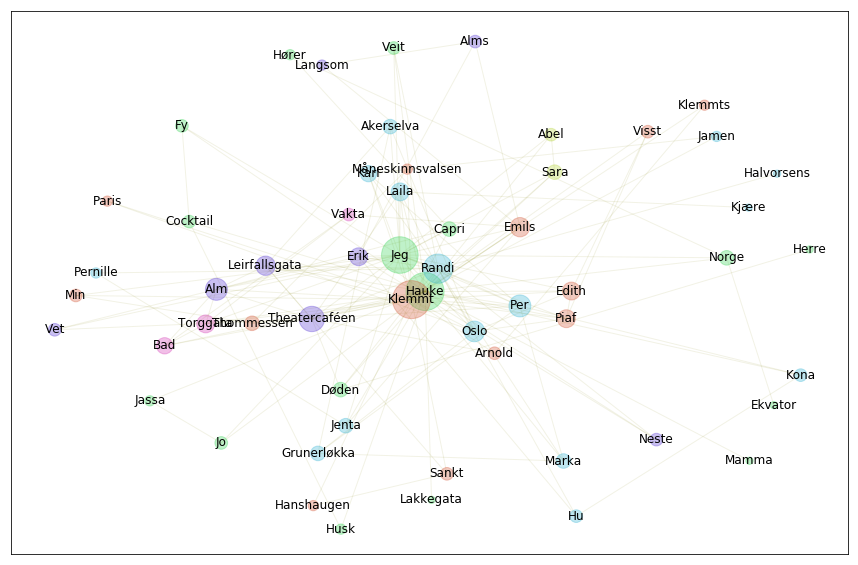

In [34]:
gnl.show_graph(GR,  spread = 1.2, fontsize=12)

In [35]:
nb.central_betweenness_characters(GR, 20)

[('Hauke', 0.3359126137210553),
 ('Klemmt', 0.29870416199961664),
 ('Jeg', 0.21437541715139113),
 ('Randi', 0.11878949693884756),
 ('Emils', 0.07369717043418343),
 ('Norge', 0.05203927025355598),
 ('Theatercaféen', 0.040133796578601784),
 ('Laila', 0.03688725415998144),
 ('Døden', 0.03571428571428571),
 ('Per', 0.027795092713923882),
 ('Oslo', 0.019674533619338814),
 ('Erik', 0.019338042909471477),
 ('Capri', 0.01809059987631416),
 ('Leirfallsgata', 0.016316753232337642),
 ('Alm', 0.013998917748917749),
 ('Torggata', 0.01300762729334158),
 ('Bad', 0.009402185116470825),
 ('Jenta', 0.008058597246908935),
 ('Karl', 0.00774582560296846),
 ('Kona', 0.00733147804576376)]

In [36]:
nb.central_characters(GR, 20)

[('Hauke', 0.4821428571428571),
 ('Klemmt', 0.4821428571428571),
 ('Jeg', 0.4464285714285714),
 ('Randi', 0.2857142857142857),
 ('Theatercaféen', 0.21428571428571427),
 ('Alm', 0.1607142857142857),
 ('Per', 0.1607142857142857),
 ('Oslo', 0.14285714285714285),
 ('Leirfallsgata', 0.125),
 ('Emils', 0.125),
 ('Erik', 0.10714285714285714),
 ('Torggata', 0.10714285714285714),
 ('Edith', 0.10714285714285714),
 ('Piaf', 0.10714285714285714),
 ('Laila', 0.10714285714285714),
 ('Bad', 0.08928571428571427),
 ('Karl', 0.08928571428571427),
 ('Sara', 0.07142857142857142),
 ('Akerselva', 0.07142857142857142),
 ('Grunerløkka', 0.07142857142857142)]